/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


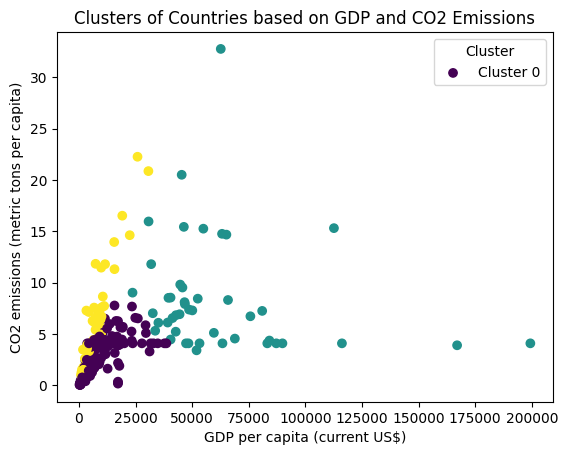

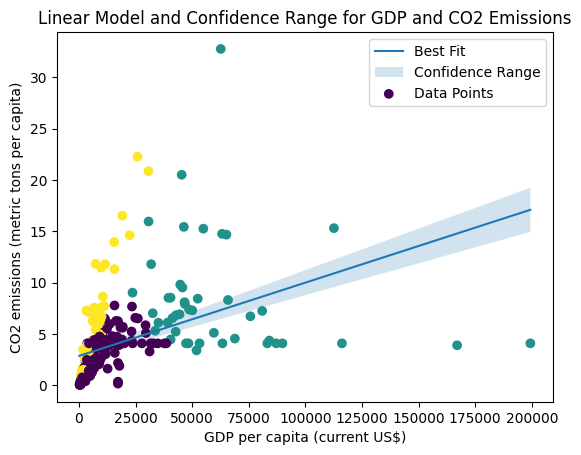

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


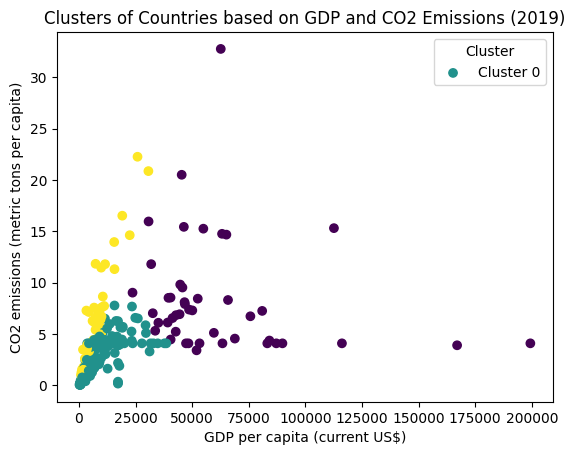

,Country Name,Cluster,GDP per capita (current US$),CO2 emissions (metric tons per capita)
54,Czechia,0,23664.847863,9.022786
16,Burundi,1,216.972968,0.060632
234,Tajikistan,2,889.020262,1.008889


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the data
gdp_per_capita = pd.read_csv('gdp_capita.csv', skiprows=4, encoding='ISO-8859-1')
co2_per_capita = pd.read_csv('CO2_emmission.csv', skiprows=4, encoding='ISO-8859-1')
co2_per_gdp = pd.read_csv('CO2 emissions (kg per 2010 US$ of GDP).csv', skiprows=4, encoding='ISO-8859-1')

co2_per_capita = co2_per_capita.drop(columns=['Unnamed: 66'])
co2_per_gdp = co2_per_gdp.drop(columns=['Unnamed: 66'])
gdp_per_capita = gdp_per_capita.drop(columns=['Unnamed: 66'])

# Merge the data on the 'Country Code' column
merged_data = gdp_per_capita[['Country Name', 'Country Code', '2019']].merge(co2_per_capita[['Country Code', '2019']], on='Country Code').merge(co2_per_gdp[['Country Code', '2019']], on='Country Code')

# Rename the columns
merged_data.columns = ['Country Name', 'Country Code', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions (kg per 2010 US$ of GDP)']

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
selected_columns = ['GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions (kg per 2010 US$ of GDP)']

imputed_values = imputer.fit_transform(merged_data[selected_columns])

# Replace the selected_columns in merged_data with the imputed values
imputed_data = merged_data.copy()
imputed_data[selected_columns] = imputed_values

# Normalize the data for clustering
normalized_data = StandardScaler().fit_transform(imputed_data[selected_columns])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the original data
imputed_data['Cluster'] = clusters

# Plot the clusters using GDP per capita and CO2 emissions per capita
plt.scatter(imputed_data['GDP per capita (current US$)'], imputed_data['CO2 emissions (metric tons per capita)'], c=imputed_data['Cluster'], cmap='viridis')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Clusters of Countries based on GDP and CO2 Emissions')
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

# Define a simple linear model
def linear_model(x, a, b):
    return a * x + b

# Fit the model using curve_fit for GDP per capita and CO2 emissions per capita
x_data = imputed_data['GDP per capita (current US$)']
y_data = imputed_data['CO2 emissions (metric tons per capita)']
params, cov = curve_fit(linear_model, x_data, y_data)

# Function to estimate confidence ranges
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p, s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   


# Estimate confidence ranges
x_pred = np.linspace(x_data.min(), x_data.max(), 100)
lower, upper = err_ranges(x_pred, linear_model, params, np.sqrt(np.diag(cov)))

# Plot the best-fitting function and the confidence range
plt.plot(x_pred, linear_model(x_pred, *params), label='Best Fit')
plt.fill_between(x_pred, lower, upper, alpha=0.2, label='Confidence Range')
plt.scatter(x_data, y_data, c=imputed_data['Cluster'], cmap='viridis', label='Data Points')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Linear Model and Confidence Range for GDP and CO2 Emissions')
plt.legend()
plt.show()



# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(merged_data[selected_columns])

# Replace the selected_columns in merged_data with the imputed values
imputed_data = merged_data.copy()
imputed_data[selected_columns] = imputed_values

# Normalize the data for clustering
normalized_data = StandardScaler().fit_transform(imputed_data[selected_columns])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the original data
imputed_data['Cluster'] = clusters

# Plot the clusters using GDP per capita and CO2 emissions per capita
plt.scatter(imputed_data['GDP per capita (current US$)'], imputed_data['CO2 emissions (metric tons per capita)'], c=imputed_data['Cluster'], cmap='viridis')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Clusters of Countries based on GDP and CO2 Emissions (2019)')
plt.show()

# Find the centroid of each cluster
centroids = kmeans.cluster_centers_
centroid_data = pd.DataFrame(centroids, columns=selected_columns)

# Calculate the distance of each country to the centroid of its cluster
imputed_data['Distance'] = imputed_data.apply(lambda row: np.linalg.norm(row[selected_columns] - centroid_data.loc[row['Cluster']]), axis=1)

# Select one representative country per cluster with the smallest distance to the centroid
representative_countries = imputed_data.loc[imputed_data.groupby('Cluster')['Distance'].idxmin()][['Country Name', 'Cluster', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
representative_countries